# Housing market analysis
### Question 

What do housing-market indicators say about the socio-economic conditions
in different geographical locations, and how can they be used to provide forecasts of
future economic conditions?

# 1. Question and business concern

**Questions interpretation**

*1. What do housing-market indicators say about the socio-economic conditions in different geographical locations.*
- In different locations, how the housing-market indicators relate to the society in terms of economy such as education, buying affordability and employment.

*2. How can housing-market indicators be used to provide forecasts of future economic conditions.*
- Do housing-market indicators have a potential correlation enough to be a predictors of the future economic conditions.  


**What are the points of business concern in the questions:**
- The housing-market related parties can be seperated to two main groups which are salepersons and customers. Also, the customers appears to have two different main buying purposes which are investment and living. It can be seen that either investors or salepersons the one thing they wanted in common is a high housebuying demand. Therefore, the key stakehoders might be interested in these questions because the social economic condition in different locations will basically indicate the number of potential customers. Morover, the question number 2 will provide the interesting prediction. When typical stakeholders had housing-market dataset on their hands, evaluating future economic conditions is how they can utilise those indicators in more effective way.     


**Key stakeholders**
1. Landlord
2. Investor
3. Economist
4. Market analyst
5. Housing market saleperson

# 2. Data

In [1]:
# import library
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt 

# LinearRegression libraries
import sklearn    
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from scipy import stats

## [2.1] Load data

The first dataset for the first question is consisted of housing-market indicator and socio-economic factors, identifying **United Kingdom** and **South Korea** as the interested locations. Representing **Urope** and **Asia** zone.

In [28]:
# Load data
filename = "Housing_market_201019_Fareeda_10548734.csv"
data = pd.read_csv(filename)
data

,Year,House_price_index_kr,Homeownership_rate_kr,Unemployment_rate_kr,Educational_attainment_kr,Minimum_Wage_kr,GDP_kr,Exchange_rate_kr,Interest_rate_kr,House_price_index_uk,Homeownership_rate_uk,Unemployment_rate_uk,Educational_attainment_uk,Minimum_Wage_uk,GDP_uk,Exchange_rate_uk,Interest_rate_uk
0,2010,91.179390,54.3,3.791363,39.044632,4110,1.090000e+12,1156.060988,4.773334,86.077898,69.9,7.935502,38.187191,5.93,2.480000e+12,0.647179,3.624425
1,2011,95.641312,NaN,3.479582,40.381783,4320,1.200000e+12,1108.292125,4.202500,84.832607,70.0,8.204994,39.412373,6.08,2.660000e+12,0.624141,3.135992
2,2012,96.818634,53.8,3.286157,41.746613,4580,1.220000e+12,1126.470826,3.447500,85.165941,67.9,8.057466,40.977753,6.19,2.700000e+12,0.633047,1.918042
3,2013,95.769465,NaN,3.218440,43.075195,4860,1.310000e+12,1094.852917,3.278083,87.350398,66.7,7.712881,41.891979,6.31,2.790000e+12,0.639661,2.389783
4,2014,97.271353,53.6,3.612396,44.498650,5210,1.410000e+12,1052.960833,3.186333,94.338643,64.6,6.259073,42.217449,6.50,3.060000e+12,0.607730,2.569083
5,2015,100.000000,NaN,3.692087,45.356678,5580,1.380000e+12,1131.157500,2.305750,100.000000,64.4,5.437789,44.197987,6.70,2.930000e+12,0.654545,1.901033
6,2016,101.621461,56.8,3.796845,46.643951,6030,1.410000e+12,1160.433435,1.747417,106.975069,63.5,4.936960,45.766762,7.20,2.690000e+12,0.740634,1.305208
7,2017,102.853472,57.7,3.764476,47.744724,6470,1.530000e+12,1130.424621,2.282583,111.833779,63.4,4.437107,45.744305,7.50,2.670000e+12,0.776977,1.235808
8,2018,104.275383,58.6,3.932760,49.008511,7530,1.620000e+12,1100.500000,2.502750,115.427013,65.0,4.099302,45.781677,7.83,2.860000e+12,0.749532,1.460658
9,2019,103.968172,NaN,3.828705,NaN,8350,NaN,1165.498904,1.702250,116.943883,65.1,3.889956,NaN,8.21,NaN,0.783445,0.935825


The second dataset for the second question is consisted of housing-market indicator and economic conditions index in **United state of Amarica.** 

In [29]:
# Load second dataset
filename2 = "GDPC1US_Fareeda_10548734.csv"
data2 = pd.read_csv(filename2)
data2

,DATE,GDP_US,Mortgage_rate_US,Homeownership_rate_US,Housing_price_index_US,Economic_con_index_US,EcoStatus
0,1/1/2000,12924.179,8.15,67.1,100.555,2.87,0
1,1/4/2000,13160.842,8.20,67.3,102.922,3.01,1
2,1/7/2000,13178.419,8.16,67.5,105.054,3.35,1
3,1/10/2000,13260.506,7.83,67.5,107.382,2.92,0
4,1/1/2001,13222.690,7.07,67.6,109.851,2.77,0
...,...,...,...,...,...,...,...
75,1/10/2018,18783.548,4.71,64.5,205.150,2.43,0
76,1/1/2019,18927.281,4.51,64.3,206.592,2.93,1
77,1/4/2019,19021.860,4.08,64.3,208.244,3.95,1
78,1/7/2019,19121.112,3.75,64.7,209.420,3.62,0


In [4]:
# extract the variables of first dataset
vars_survey = data.columns.tolist()
vars_survey

['Year',
 'House_price_index_kr',
 'Homeownership_rate_kr',
 'Unemployment_rate_kr',
 'Educational_attainment_kr',
 'Minimum_Wage_kr',
 'GDP_kr',
 'Exchange_rate_kr',
 'Interest_rate_kr',
 'House_price_index_uk',
 'Homeownership_rate_uk',
 'Unemployment_rate_uk',
 'Educational_attainment_uk',
 'Minimum_Wage_uk',
 'GDP_uk',
 'Exchange_rate_uk',
 'Interest_rate_uk']

In [5]:
# extract the variables of second dataset
vars_survey2 = data2.columns.tolist()
vars_survey2

['DATE',
 'GDP_US',
 'Mortgage_rate_US',
 'Homeownership_rate_US',
 'Housing_price_index_US',
 'Economic_con_index_US',
 'EcoStatus']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
Year                         10 non-null int64
House_price_index_kr         10 non-null float64
Homeownership_rate_kr        6 non-null float64
Unemployment_rate_kr         10 non-null float64
Educational_attainment_kr    9 non-null float64
Minimum_Wage_kr              10 non-null int64
GDP_kr                       9 non-null float64
Exchange_rate_kr             10 non-null float64
Interest_rate_kr             10 non-null float64
House_price_index_uk         10 non-null float64
Homeownership_rate_uk        10 non-null float64
Unemployment_rate_uk         10 non-null float64
Educational_attainment_uk    9 non-null float64
Minimum_Wage_uk              10 non-null float64
GDP_uk                       9 non-null float64
Exchange_rate_uk             10 non-null float64
Interest_rate_uk             10 non-null float64
dtypes: float64(15), int64(2)
memory usage: 1.5 KB


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
DATE                      80 non-null object
GDP_US                    80 non-null float64
Mortgage_rate_US          80 non-null float64
Homeownership_rate_US     80 non-null float64
Housing_price_index_US    80 non-null float64
Economic_con_index_US     80 non-null float64
EcoStatus                 80 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.5+ KB


**Preprocess data**

- Therefore, the data was collected through professional organisation most of them are stuctured data and trustworthy.
- There are some of missing values for the first dataset.
- Data is sorted by year and grouped by country.
- Most of data is integer and float data type.

### [2.2] Data source (references)

**First question selected variables.**

Housing-market indicator in Korea and United Kingdom:
- <a href="https://data.oecd.org/price/housing-prices.htm">Housing price index reference</a>
- <a href="https://tradingeconomics.com/united-kingdom/home-ownership-rate">Homeownership rate</a>

Socio-economic in Korea and United Kingdom:
- <a href="https://fred.stlouisfed.org/series/LRUN64TTKRM156S">Unemployment rate</a> [Note: Aged 15-64]
- <a href="https://data.oecd.org/eduatt/adult-education-level.htm">Educational attainment</a> [Note: Tertiary level, Aged 25-64 year-olds]
- <a href="https://tradingeconomics.com/united-kingdom/minimum-wages">Minimum wages</a> (USD/hour)

**Second question selected variable**

Economic conditions and Housing-market indicators in United state of Amarica.
- <a href="https://fred.stlouisfed.org/series/LASAGRIDX">Economic condition index</a> 
- <a href="https://fred.stlouisfed.org/series/GDPC1">GDP </a> (Billion dollas)
- <a href="https://fred.stlouisfed.org/series/MORTGAGE30US">Mortgage rate</a> 
- <a href="https://fred.stlouisfed.org/series/CSUSHPISA">Housing price index </a>
- <a href="https://fred.stlouisfed.org/series/RSAHORUSQ156S#0">Homeownership rate</a>

# 3. Analysis and Visualisation

### [3.1] What do housing-market indicators say about the socio-economic conditions in different geographical locations.
**Variables list:**

**housing-market indicators**
- **House price index :** this variable shows the standard house price change over the time period.   
- **Homeownership rate :** the ratio of the number of houses that have been owned. It may help us identify housing affordability for the citizens.

**socio-economic conditions**
- **Unemployment rate :** this factor is affected directly to the social economy in terms of employment and related to personal income. 
- **Educational attainment :** education might be an essential foundation of citizens' quality in society. Therefore, social economy must be drived by the compulsory education that the citizens should be obtained.
- **Minimum Wage :** this index indicate minimum income for the citizens. The number of potential customers may be related by the minimum salary per hour growth rate of each country.

In [8]:
# select appropriate variables
# fill missing values of Homeownership rate in Korea by interpolation
kor_house_social = data.loc[:, 'Year':'Minimum_Wage_kr']
kor_house_social['Homeownership_rate_kr'] = kor_house_social['Homeownership_rate_kr'].interpolate()
kor_house_social['Educational_attainment_kr'] = kor_house_social['Educational_attainment_kr'].fillna(method='ffill')
kor_house_social = kor_house_social.set_index('Year')

uk_house_social = data[['Year', 'House_price_index_uk', 'Homeownership_rate_uk', 'Unemployment_rate_uk', 'Educational_attainment_uk', 'Minimum_Wage_uk']]
uk_house_social['Educational_attainment_uk'] = uk_house_social['Educational_attainment_uk'].fillna(method='ffill')
uk_house_social = uk_house_social.set_index('Year')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [9]:
# merging data
df = pd.merge(kor_house_social, uk_house_social, on ='Year')
df

,House_price_index_kr,Homeownership_rate_kr,Unemployment_rate_kr,Educational_attainment_kr,Minimum_Wage_kr,House_price_index_uk,Homeownership_rate_uk,Unemployment_rate_uk,Educational_attainment_uk,Minimum_Wage_uk
Year,,,,,,,,,,
2010,91.179390,54.30,3.791363,39.044632,4110,86.077898,69.9,7.935502,38.187191,5.93
2011,95.641312,54.05,3.479582,40.381783,4320,84.832607,70.0,8.204994,39.412373,6.08
2012,96.818634,53.80,3.286157,41.746613,4580,85.165941,67.9,8.057466,40.977753,6.19
2013,95.769465,53.70,3.218440,43.075195,4860,87.350398,66.7,7.712881,41.891979,6.31
2014,97.271353,53.60,3.612396,44.498650,5210,94.338643,64.6,6.259073,42.217449,6.50
2015,100.000000,55.20,3.692087,45.356678,5580,100.000000,64.4,5.437789,44.197987,6.70
2016,101.621461,56.80,3.796845,46.643951,6030,106.975069,63.5,4.936960,45.766762,7.20
2017,102.853472,57.70,3.764476,47.744724,6470,111.833779,63.4,4.437107,45.744305,7.50
2018,104.275383,58.60,3.932760,49.008511,7530,115.427013,65.0,4.099302,45.781677,7.83


Plot the correlation between House price index and Homeownership rate of both country to see the difference.

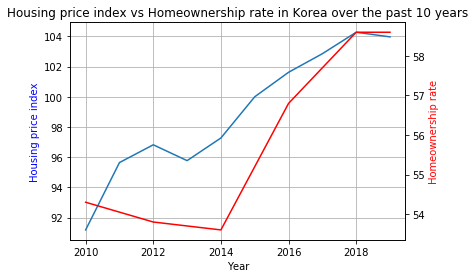

In [10]:
# understand the correlation
# plot the correlation between House price index and Homeownership rate for Korea
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df.House_price_index_kr)
ax1.set_ylabel('Housing price index', color ='b')
ax1.set_xlabel('Year')

ax2 = ax1.twinx()
ax2.plot(df.Homeownership_rate_kr, 'r-')
ax2.set_ylabel('Homeownership rate', color='r')

ax1.grid()
plt.title('Housing price index vs Homeownership rate in Korea over the past 10 years')
plt.show()

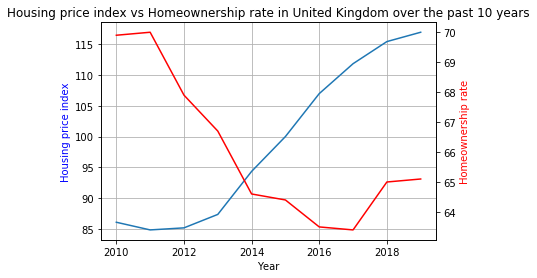

In [11]:
# plot the correlation between House price index and Homeownership rate for United Kingdom
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df.House_price_index_uk)
ax1.set_ylabel('Housing price index', color ='b')
ax1.set_xlabel('Year')

ax2 = ax1.twinx()
ax2.plot(df.Homeownership_rate_uk, 'r-')
ax2.set_ylabel('Homeownership rate', color='r')

ax1.grid()
plt.title('Housing price index vs Homeownership rate in United Kingdom over the past 10 years')
plt.show()

**[3.1.1] Analysis Part 1**

2 figures above show the relation between "Housing price index" vs "Homeownership rate" over the past 10 years in Korea and UK. It can be seen that:
- In **Korea** the housing price and the homeownership rate increased continuously for the past 10 years. This means that although the house's cost increased, the demand of buying house enhanced as well.
- On the other hand, In **UK** there is a negative correlation between housing price and homeownership rate. While the housing price was rising gradually, the homeownership rate decreased.
- However, both country has a fall period around 2014. It is possibly that there were some world economic crisis at that time.

After understanding the correlation of the housing-market indicators from differnt geographical location. As a result, the interesting indicators might be **Homeownership rate** because the difference between both country may indicate the different points of social economy between them. Next step, the relationship between housing-market and socio-economic will be analysed.

**Socio-economic** is the economic activities that would be affected society, communities, household and citizens' well-being. Therefore, the variables that reflect socio-economic should be:
- Unemployment_rate
- Educational_attainment
- Minimum_Wage

*These socio-econimic conditions of Korea and UK will be compared with Homeownership rate from 2010-2019.*

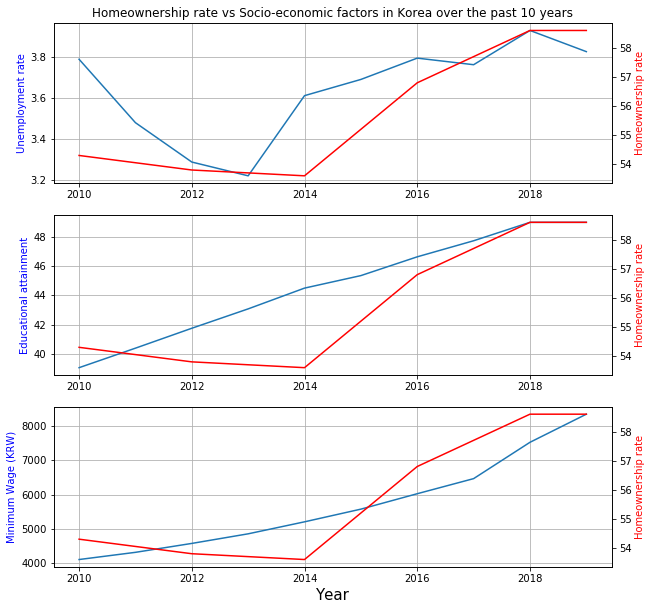

In [12]:
# plot the relationship between Homeownership rate and socio-economic factors in Korea.
fig = plt.figure(figsize=(10,10))
s1 = df.Unemployment_rate_kr
s2 = df.Educational_attainment_kr
s3 = df.Minimum_Wage_kr

ax1 = plt.subplot(311)
ax1.plot(s1)
ax1.set_ylabel('Unemployment rate', color ='b')
ax2 = ax1.twinx()
ax2.plot(df.Homeownership_rate_kr, 'r-')
ax2.set_ylabel('Homeownership rate', color='r')
plt.title('Homeownership rate vs Socio-economic factors in Korea over the past 10 years')

ax3 = plt.subplot(312, sharex=ax1)
ax3.plot(s2)
ax3.set_ylabel('Educational attainment', color ='b')
ax4 = ax3.twinx()
ax4.plot(df.Homeownership_rate_kr, 'r-')
ax4.set_ylabel('Homeownership rate', color='r')

ax5 = plt.subplot(313, sharex=ax1)
ax5.plot(s3)
ax5.set_ylabel('Minimum Wage (KRW)', color ='b')
ax5.set_xlabel('Year', fontsize = 15)
ax6 = ax5.twinx()
ax6.plot(df.Homeownership_rate_kr, 'r-')
ax6.set_ylabel('Homeownership rate', color='r')

ax1.grid()
ax3.grid()
ax5.grid()
plt.show()

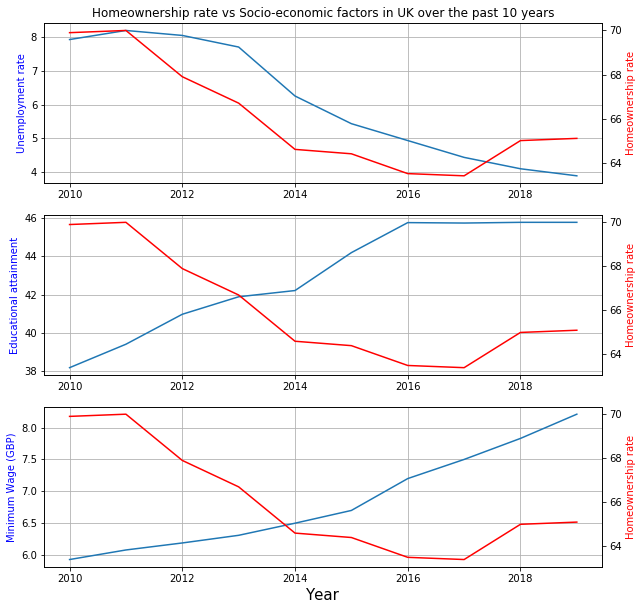

In [13]:
# plot the relationship between Homeownership rate and socio-economic factors in UK.
fig = plt.figure(figsize=(10,10))
s1 = df.Unemployment_rate_uk
s2 = df.Educational_attainment_uk
s3 = df.Minimum_Wage_uk

ax1 = plt.subplot(311)
ax1.plot(s1)
ax1.set_ylabel('Unemployment rate', color ='b')
ax2 = ax1.twinx()
ax2.plot(df.Homeownership_rate_uk, 'r-')
ax2.set_ylabel('Homeownership rate', color='r')
plt.title('Homeownership rate vs Socio-economic factors in UK over the past 10 years')

ax3 = plt.subplot(312, sharex=ax1)
ax3.plot(s2)
ax3.set_ylabel('Educational attainment', color ='b')
ax4 = ax3.twinx()
ax4.plot(df.Homeownership_rate_uk, 'r-')
ax4.set_ylabel('Homeownership rate', color='r')

ax5 = plt.subplot(313, sharex=ax1)
ax5.plot(s3)
ax5.set_ylabel('Minimum Wage (GBP)', color ='b')
ax5.set_xlabel('Year', fontsize = 15)
ax6 = ax5.twinx()
ax6.plot(df.Homeownership_rate_uk, 'r-')
ax6.set_ylabel('Homeownership rate', color='r')

ax1.grid()
ax3.grid()
ax5.grid()
plt.show()

**[3.1.2] Analysis Part 2**

The main point of results will be discussed as follow:
- In term of Minimum wage and Education attainment, they increased significantly not only in Korea but in UK as well. 
- However, it has a negative correlation between [Minimum wage and Education attainment] and [Homeownership rate] in UK. Differing from Korea, it has a positive relationship.
- This means that higher minimum wage and obtaining compulsory education may not help enhancing the housebuying demand for the people in UK.
- Another noticable point is Unemployment rate change. In Korea, even unemployment rate was rising, the house buying demand increased either that contrast with UK situation.
- It can be asuumed that the different locations with the different culture, lifestyle and economic system may have a different consume behavior also the potential of owning the residential accomodation.

### [3.2] How can housing-market indicators be used to provide forecasts of future economic conditions.

**Variables list:**
- **Economic condition index** : This factor is the essential factor for answering the question. Economic condition index indicates the big picture of economic activity for specific location. It is the combination of GDP, interest rate, unemployment rate, inflation rate and so on.
- **Housing price index and Homeownership rate** : These two factors represent the housing-market indicators interm of housing price and housebuying demand.

**Optional variables list**
- **GDP** :  <a href="https://www.investopedia.com/terms/g/gdp.asp"> "GDP is the monetary value of all finished goods and services made within a country during a specific period."</a> For this reason, GDP should be an appropriate factor to represent a economic condition. Overall country's economic cycle (consume product, interest rate, household dept and so on) is included in this indicator.
- **Mortgage rate** : <a href="https://www.investopedia.com/terms/m/mortgage-rate.asp"> "A mortgage rate is the rate of interest charged on a mortgage."</a> Mortgage rate may be the first consideration for homebuyers to concern affordability purchasing houses. Mortgage rate can possibly represent the status of economy and housing market at the same time through the interest rate. If the interest rate rises, the housebuying demand will usually drop as well.  


**United state of America** dataset will be used in this analysis because of high diverse countries and multicultural. It may able to be asuumed as a represtative unit of analysis for general economic system in the world.

In [14]:
# clean dataset 
data3 = data2.drop(['DATE', 'EcoStatus'], axis=1)
data3

,GDP_US,Mortgage_rate_US,Homeownership_rate_US,Housing_price_index_US,Economic_con_index_US
0,12924.179,8.15,67.1,100.555,2.87
1,13160.842,8.20,67.3,102.922,3.01
2,13178.419,8.16,67.5,105.054,3.35
3,13260.506,7.83,67.5,107.382,2.92
4,13222.690,7.07,67.6,109.851,2.77
...,...,...,...,...,...
75,18783.548,4.71,64.5,205.150,2.43
76,18927.281,4.51,64.3,206.592,2.93
77,19021.860,4.08,64.3,208.244,3.95
78,19121.112,3.75,64.7,209.420,3.62


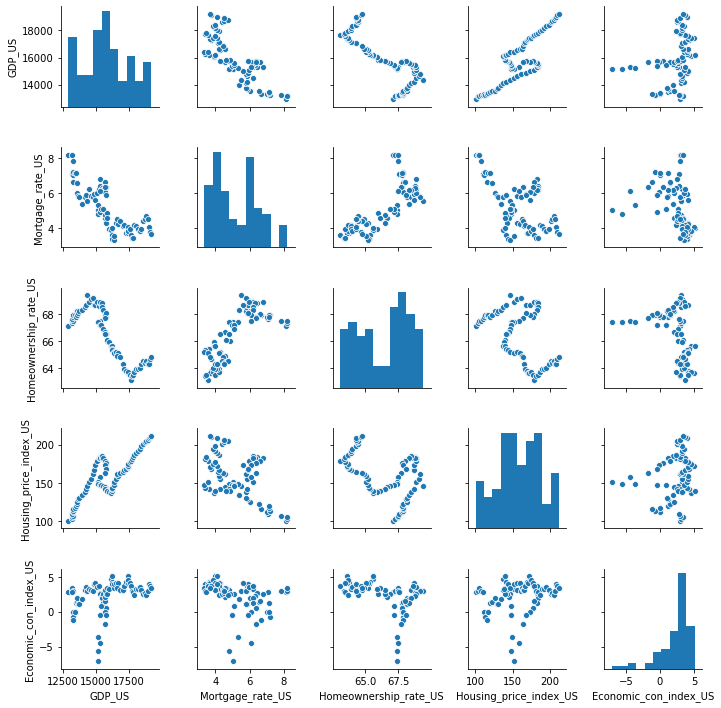

In [15]:
# plot correlation between them to see the trend of analysis
sns.pairplot(data3, height=2)

**[3.2.1] Analysis Part 1**

From the graph above, we can see that:
- Housing price index follows the same trend of GDP. This shows that more consumptions, investments and spendings of the country may affect directly to the increasment of housing price. 
- On the other hand, Homeownership rate and Mortgage rate dropped over the past 20 years.
- There are some outliers and fluctuated trend for each pairs of economic condition index. It can not see the trand clearly from these two correlation because of the little change over the past 20 years. 

### Analysis technique

From the dataset, the most appropriate method for predict might be the linear regression. However, "Why the methods that we've learnt so far are not appropriate?". The answer is we cannot define the probability of each values of random variables, so the Bayesian network technique should not be applied on this dataset. Therefore, the regression analysis is one of the basic techniques for building the simple model of the relation between dependent variables and independent variables.  


**First experiment:**
- Economic_con_index_US as a response (dependent variable)
- Housing_price_index_US and Homeownership_rate_US as a predictors (independent variables)

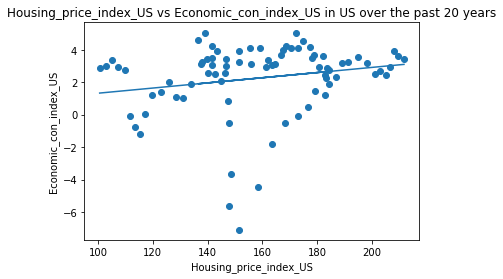

In [16]:
# plot the regression line graph
x = data3['Housing_price_index_US']
y = data3['Economic_con_index_US']

plt.scatter(x,y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel('Housing_price_index_US')
plt.ylabel('Economic_con_index_US')
plt.title('Housing_price_index_US vs Economic_con_index_US in US over the past 20 years')
plt.show()

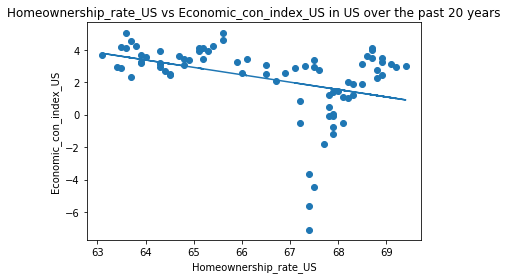

In [17]:
# plot the regression line graph
x = data3['Homeownership_rate_US']
y = data3['Economic_con_index_US']

plt.scatter(x,y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel('Homeownership_rate_US')
plt.ylabel('Economic_con_index_US')
plt.title('Homeownership_rate_US vs Economic_con_index_US in US over the past 20 years')
plt.show()

**In statistical method**, it is necessary to check statistical parameters such as R-square and p-value before doing linear regression model. Those parameters able to tell the confidence of a potential relationship between the predictors and the outcome. However, in this case it might be assumed that this correlation can perfrom linear regression method for continuing the analysis.

**Train the dataset with Multiple Linear Regression method**

In [18]:
# Economic_condition_index vs Housing_price_index_US, Homeownership_rate_US
X = data3[['Housing_price_index_US', 'Homeownership_rate_US']].values
y = data3['Economic_con_index_US'].values

# train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# fit the data
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test) 

# create coefficient of each variable
coeff_df = pd.DataFrame(regressor.coef_, data3[['Housing_price_index_US', 'Homeownership_rate_US']].columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Housing_price_index_US,0.003187
Homeownership_rate_US,-0.423838


In [19]:
# see actual values and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,4.22,2.657833
1,2.28,1.349191
2,1.46,1.675234
3,3.95,3.336268
4,2.58,2.398246
5,3.55,3.420728
6,2.94,3.630360
7,2.33,3.522648
8,4.60,2.556938
9,3.21,3.444249


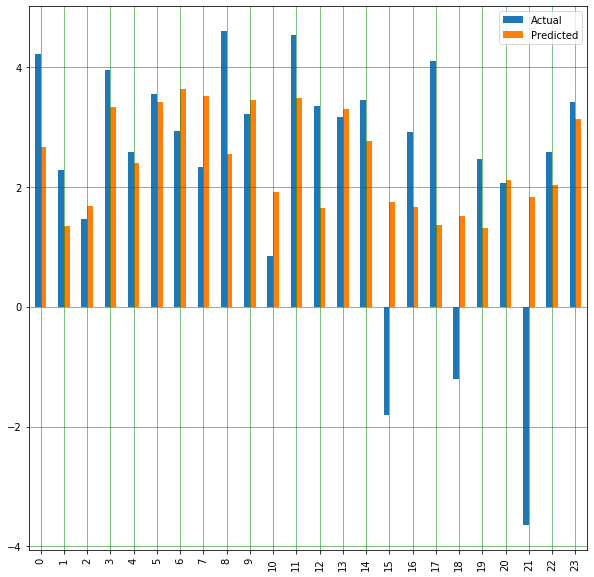

In [20]:
# visualisation actual values and predicted values
df.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [21]:
# evaluate the performance of algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.261132595056236
Mean Squared Error: 3.1916116143435143
Root Mean Squared Error: 1.7865082183811847


**[3.2.2] Analysis Part 2**

- We can evaluate the performance from the set of error that is the deviation between actual values and predicted values above. The model with low Mean Squared Error is a good predictive model. However, the acceptable error value depends on the area of analysis, outliers and the number of datasets. Next step, try to utilise the meaningful components of economic condition which are GDP and mortgage rate to predict the future economy instead.

**Second experiment:**
- GDP as a response (dependent variable)
- Mortgage_rate_US as a response (dependent variable)
- Housing_price_index_US and Homeownership_rate_US as a predictor (independent variables)

In [22]:
# GDP vs Housing_price_index_US, Homeownership_rate_US
X = data3[['Housing_price_index_US', 'Homeownership_rate_US']].values
y = data3['GDP_US'].values

# train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# fit the data
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test) 

# create coefficient of each variable
coeff_df = pd.DataFrame(regressor.coef_, data3[['Housing_price_index_US', 'Homeownership_rate_US']].columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Housing_price_index_US,37.663255
Homeownership_rate_US,-491.515198


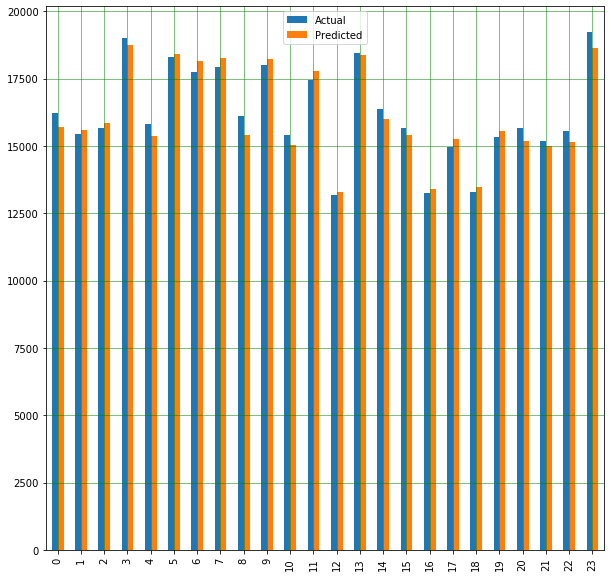

In [23]:
# see actual values and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# visualisation actual values and predicted values
df.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [24]:
# evaluate the performance of algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 306.1703920907496
Mean Squared Error: 119051.82505239321
Root Mean Squared Error: 345.03887469732047


**Try with mortgage rate**

In [25]:
# Mortgage_rate vs Housing_price_index_US, Homeownership_rate_US
X = data3[['Housing_price_index_US', 'Homeownership_rate_US']].values
y = data3['Mortgage_rate_US'].values

# train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# fit the data
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test) 

# create coefficient of each variable
coeff_df = pd.DataFrame(regressor.coef_, data3[['Housing_price_index_US', 'Homeownership_rate_US']].columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Housing_price_index_US,-0.011267
Homeownership_rate_US,0.429264


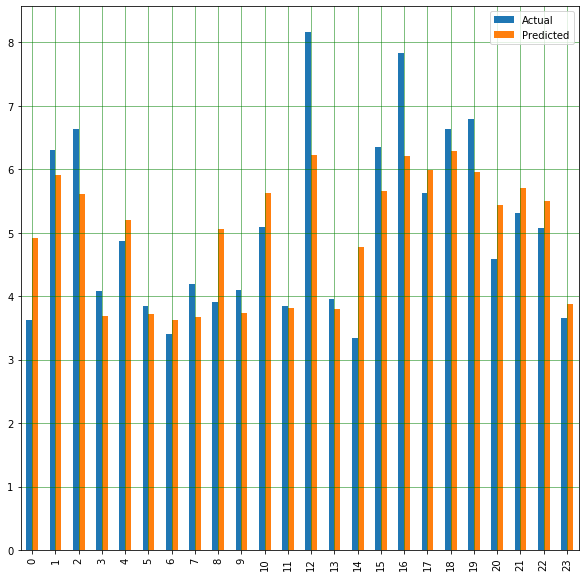

In [26]:
# see actual values and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# visualisation actual values and predicted values
df.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [27]:
# evaluate the performance of algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6507542758664348
Mean Squared Error: 0.6741636279723039
Root Mean Squared Error: 0.8210746786817286


**[3.2.3] Analysis Part 3**

- The results are so interesting, both of GDP and Mortgage rate tend to relate with housing-market indicators.
- The question for the future analysis is, can we use GDP and mortgage rate instead economic condition index for prediction the future economic condition.

# 4.Insight

### Answer the questions

**1. What do housing-market indicators say about the socio-economic conditions in different geographical locations.**
- From the analysis, we can see that difference geographical locations show the difference relation between housing-market indicators and socio-economic conditions.
- Housing price increased concurrently with minimum wage and education attainment over the past 10 years in UK and Korea and tends to rise continuousely in the future.
- Homeownership rate of both country had an opposite trend. 
- In Korea, the increasement of unemployment rate does not seem to influence housebuying demand, homeownership rate was still increasing. 
- In UK, unemployment rate dropped continuously since 2010 as well as homeownership rate but from 2017 housebuying damand was rising slightly until 2019.
- To summerise, for typical stakeholders such as real estate investors, market analysts and economists in housing-market business, the prior consideration of housing-market investment might be soico-economic condition. For example, health, well-being, environmental quality and education are the essential factors for making more effective decision. 
- Espeacially, difference locations have a difference consumers' behavior for this reason, investment location should be concerned as well. 

**2. How can housing-market indicators be used to provide forecasts of future economic conditions.**
- The correlation of housing-market indicators and economic conditions has been modeled under the assumption that they have a linear regression relationship.
- It may conclude that housing-market indicators have a potetial to provide forecasts of future economic conditions but to reduce the error of prediction, more housing-market indecators should be included to increase the accuracy of analysis and more the number of data is needed. 
- Otherwise, the meaningful compositions of economic conditions such as GDP, interest rate and inflation rate seem to be good enough the response variable instead of economic conditions.
- In conclusion, housing-market indicators may indirectly predict the future economic conditions. 
- In order to evaluate organisation's ability for encountering with future economic situation, stakeholders such as business developers, economists and market analysts can use the housing-market indicators as one of the forcasting factors for analyse future economic status.    
